# 1. Airlines Dataset

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [235]:
airlines = pd.read_csv("C:\\Users\\91920\\Downloads\\EastWestAirlines.csv")

In [210]:
airlines

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

# EDA & Visualization

In [211]:
airlines.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [212]:
airlines.shape


(3999, 12)

In [213]:
airlines.isna().sum() 


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [214]:
airlines.describe()


ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

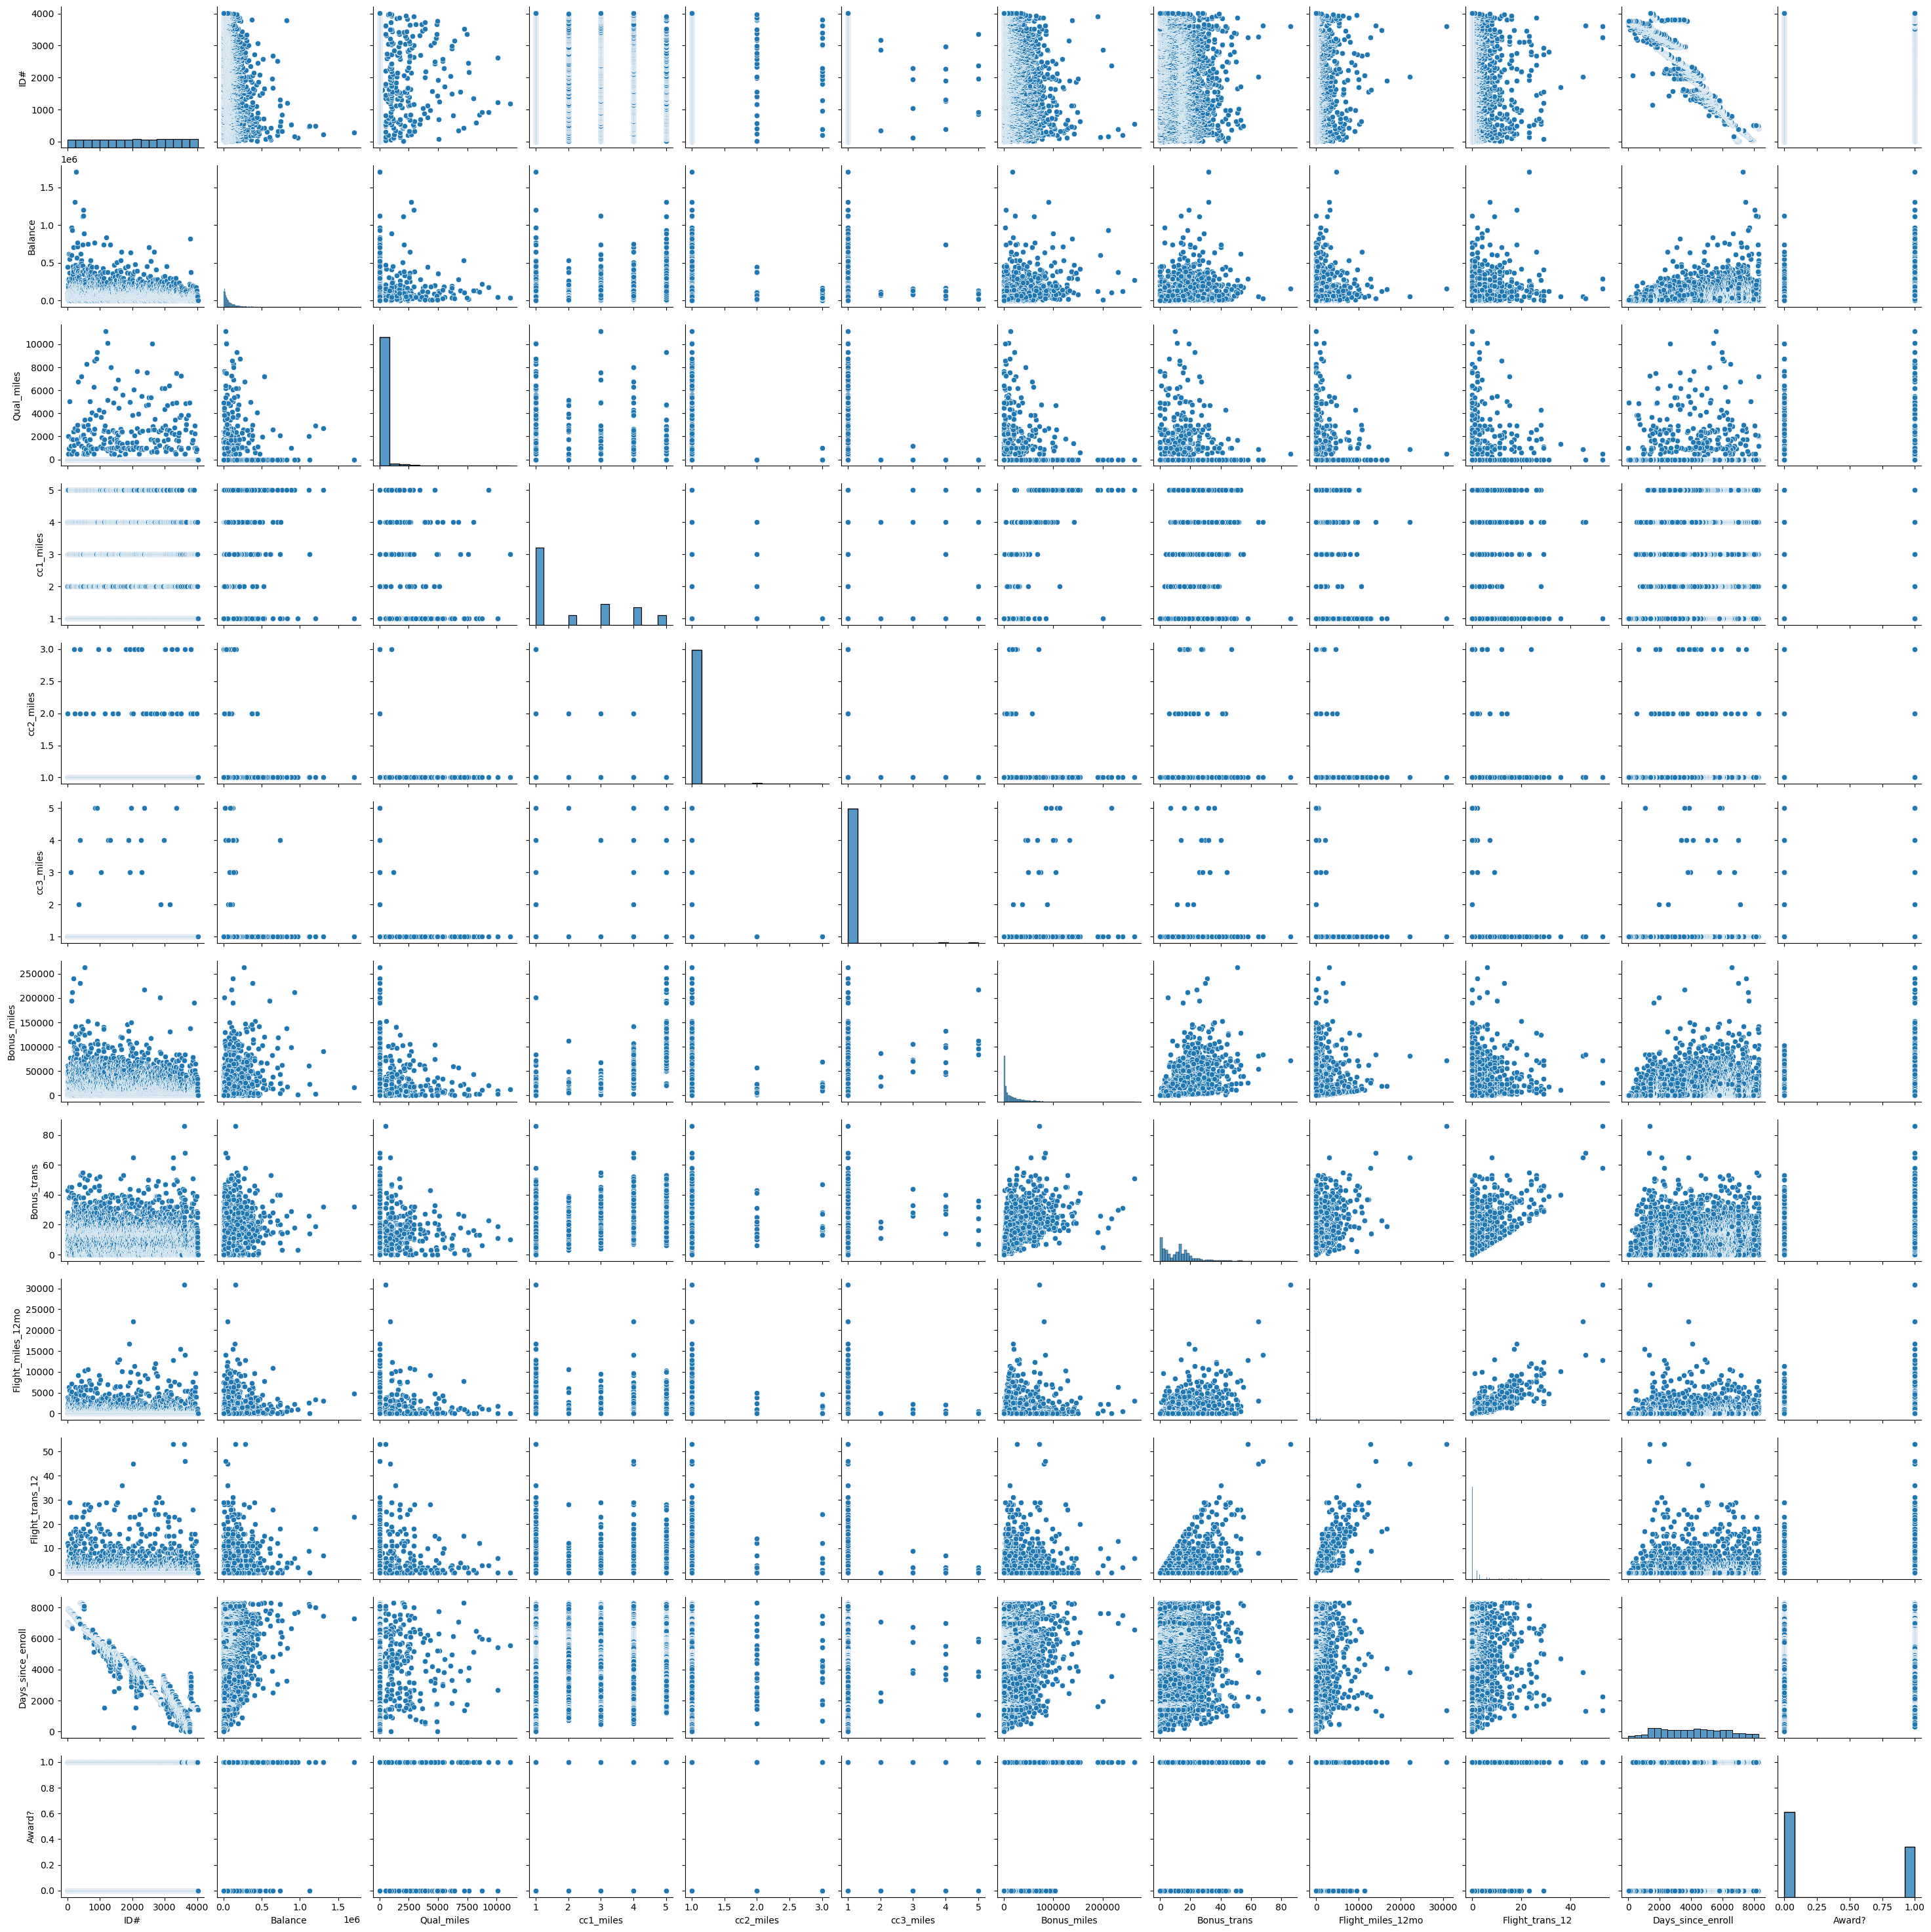

In [215]:
sns.pairplot(airlines)

In [216]:
#Distribution and Relationships: A pairplot allows you to visualize the distributions of individual variables along the diagonal and scatter plots for variable pairs on the off-diagonal. You can identify whether the variables are normally distributed, skewed, or have any distinctive patterns.

#Correlation: By looking at the scatter plots, you can gauge the relationship between pairs of variables. If points are clustered around a diagonal line, it indicates a positive correlation. If they are scattered or show a different pattern, it indicates a different kind of relationship.

#Outliers: Scatter plots might reveal outliers, which are data points that deviate significantly from the overall pattern. These outliers could impact the results of various clustering algorithms.

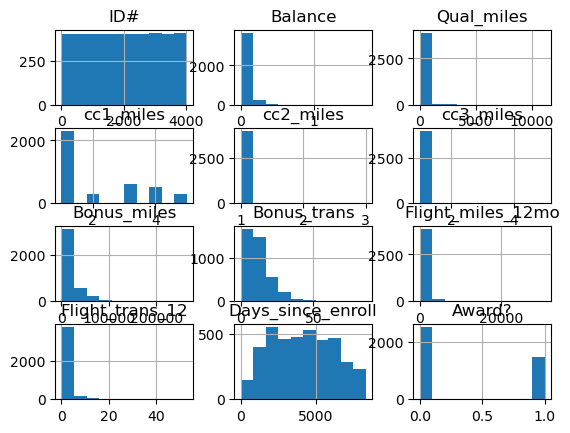

In [217]:
airlines.hist();

In [218]:
#Variable Distributions: You can observe the general shape of the distribution for each variable. Histograms can show whether the data is symmetric (normal distribution), skewed (positively or negatively), or has a different distribution shape.

#Central Tendency: You can estimate the central tendency of each variable by looking at where the peak of the histogram is located. The peak often corresponds to the mean or median of the variable.

#Spread and Variability: The width of the histogram provides information about the variability or spread of the data. A wider histogram indicates higher variability, while a narrower histogram suggests lower variability.

#Outliers: Outliers, which are values significantly different from the rest of the data, can be identified as isolated bars that are far away from the main cluster of bars in the histogram.

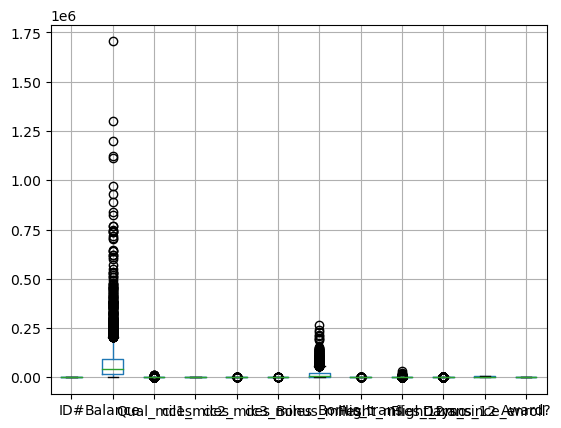

In [219]:
airlines.boxplot();

In [220]:
#Central Tendency: The line inside the box represents the median of the data. It provides a quick measure of the data's central tendency.

#Variability and Spread: The width of the box indicates the interquartile range (IQR), which contains the middle 50% of the data. A wider box indicates greater variability, while a narrower box suggests lower variability.

#Skewness: The orientation of the box relative to the median line can indicate the skewness of the distribution. If the box is shifted toward one end of the whisker, it suggests skewness in that direction.

#Outliers: Individual data points beyond the "whiskers" (lines extending from the box) are potential outliers. Outliers are data points that significantly deviate from the rest of the data and may indicate unusual observations

**Hierarchy Clustering**


In [ ]:
# create dendrogram
plt.figure(figsize = (16, 10));
dendrogram = sch.dendrogram(sch.linkage(airlines, method='average'))

In [ ]:
dendrogram

In [ ]:
# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [ ]:
# save clusters for chart
y_hc = hc.fit_predict(airlines)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

In [ ]:
airlines1 = pd.concat([airlines,Clusters], axis=1)
airlines1

In [ ]:
airlines1.sort_values("Clusters")


**K-Means**


In [ ]:
kmeans = KMeans(n_clusters=14,random_state=0)
kmeans.fit(airlines)

In [ ]:
kmeans.inertia_


In [ ]:
wcss = []
for i in range(1, 19):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(airlines)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss


In [ ]:
plt.plot(range(1, 19), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Optimal Cluster Number: The plot aims to find the point on the curve where adding more clusters doesn't significantly reduce the within-cluster sum of squares. This point is often referred to as the "elbow point." The optimal number of clusters is usually chosen at or near this elbow point.

#Trade-off: The plot showcases the trade-off between the number of clusters and the compactness of data points within clusters. As you increase the number of clusters, the WCSS tends to decrease, but there's a diminishing return in terms of gaining meaningful separation between clusters.

#Identifying the Elbow Point: Inspecting the plot visually, you'll look for the point where the curve starts to level off or form an "elbow." This is the point where adding more clusters doesn't provide a significant improvement in clustering quality.

**OR**

In [ ]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(7, random_state=0)
clusters_new.fit(airlines)

In [ ]:
clusters_new.labels_


In [ ]:
# Converting array to dataframe
df = pd.DataFrame(clusters_new.labels_, columns =['Cluster ID'])

In [ ]:
df

In [ ]:
airlines2 = pd.concat([airlines,df], axis=1)
airlines2

In [ ]:
airlines3=airlines2.drop(['ID#'], axis=1)

In [ ]:
airlines3.groupby('Cluster ID').agg(['mean']).reset_index()

In [ ]:
airlines3['Cluster ID'].value_counts()

**DBSCAN**

In [ ]:
airlines.head(4)


In [ ]:
a=airlines.values
a

In [ ]:
stscaler = StandardScaler().fit(a)
X1 = stscaler.transform(a)

In [ ]:
dbscan = DBSCAN(eps=0.82, min_samples=6)
dbscan.fit(X1)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

In [ ]:
cl=pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [ ]:
airlines4 = pd.concat([airlines,cl],axis=1)
airlines4

In [ ]:
airlines4['Cluster'].value_counts()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Load the dataset
airlines = pd.read_csv("C:\\Users\\91920\\Downloads\\EastWestAirlines.csv")

# Separate features
X = airlines.drop(columns=['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN clustering
eps = 0.5  # Specify the epsilon parameter (replace with appropriate value)
min_samples = 5  # Specify the min_samples parameter (replace with appropriate value)
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Create a DataFrame with the DBSCAN cluster labels
cl = pd.DataFrame(dbscan_labels, columns=['Cluster'])

# Concatenate cluster labels with the original DataFrame
airlines4 = pd.concat([airlines, cl], axis=1)

# Display the value counts of clusters
print(airlines4['Cluster'].value_counts())

# Perform PCA with maximum components or 'mle'
pca = PCA(n_components='mle', svd_solver='full')
pca_result = pca.fit_transform(X_scaled)

# Add PCA results to the DataFrame
for i in range(pca_result.shape[1]):
    airlines4[f'PCA{i+1}'] = pca_result[:, i]

# Display the updated DataFrame
print(airlines4.head())


In [ ]:
#Visualization:
#Visualize the data points in the reduced PCA space (e.g., PCA1 vs. PCA2) to observe patterns or clusters.
#Points closer in the PCA space may have similar characteristics in the original feature space.

#Cluster Identification:
#If there are visible clusters in the PCA space, they might represent specific segments of passengers or customer behaviors.

#Outliers and Noise:
#Outliers or noisy data points might be easier to identify in the PCA space, especially if they deviate from the main cluster.

# Scaling

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(airlines4)

In [ ]:
scaler.transform(airlines4)

# plotly visualization

In [237]:
# import pandas as pd
import plotly.express as px

# Load the airlines dataset
airlines = pd.read_csv("C:\\Users\\91920\\Downloads\\EastWestAirlines.csv")

# Assuming you want to visualize columns like 'Balance' and 'Qual_miles'
x_column = 'Balance'
y_column = 'Qual_miles'

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(airlines, x=x_column, y=y_column,
                 title='Interactive Scatter Plot with Plotly Express')
fig.show()


In [239]:
#Balance vs. Qual_miles: Observe the relationship between "Balance" (frequent flyer balance) and "Qual_miles" (qualifying miles flown). Do passengers with higher balances tend to have higher qualifying miles, suggesting they are frequent travelers?

#Clusters or Patterns: Look for any clusters or patterns in the scatter plot. Are there distinct groups of data points that represent different behaviors or customer segments?

#Distribution of Data: Analyze the spread of data points along both axes. Are there any trends that show how passengers' balance and qualifying miles are distributed?

#Outliers: Identify any data points that stand out as outliers. These could represent unique cases that warrant further investigation

# Bohek 

In [238]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource

# Load the airlines dataset
airlines = pd.read_csv("C:\\Users\\91920\\Downloads\\EastWestAirlines.csv")

# Assuming you want to visualize columns like 'Balance' and 'Qual_miles'
x_column = 'Balance'
y_column = 'Qual_miles'

# Create a Bokeh figure
source = ColumnDataSource(data=airlines)
p = figure(width=800, height=600, title='Interactive Scatter Plot with Bokeh')

# Add scatter plot
p.circle(x_column, y_column, source=source, size=10)

# Show the plot
output_notebook()
show(p)


Loading BokehJS ...

In [240]:
#Data Distribution: Examine the density and distribution of data points in the scatter plot. Are there areas where points are more concentrated?

#Interaction and Exploration: Use Bokeh's interactive tools to zoom in, pan, and hover over data points. This can help you focus on specific regions and gather details about individual data points.

#Relationship Trends: Analyze the overall trend between "Balance" and "Qual_miles." Are there any trends that suggest a correlation or lack thereof between these two variables?

#Data Spread: Consider the spread of data points along both axes. Are there areas where points are tightly clustered or more dispersed?

# Reduce skewness

In [188]:
np.sqrt(airlines4.Cluster)

0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
3994    1.0
3995    1.0
3996    1.0
3997    0.0
3998    0.0
Name: Cluster, Length: 3999, dtype: float64

# 2. Crime Dataset

In [189]:
c = pd.read_csv("C:\\Users\\91920\\Downloads\\crime_data.csv")

In [190]:
c

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18           Maine     2.1       83        51   7.8
19        Maryland    11.3      300        67  27.8
20   Massachusetts     4.4      149        85  16.3
21        Michigan    12.1      255        74  35.1
22       Minnesota     2.7       72        66  14.9
23     Mississippi    16.1      259        44  17.1
24        Missouri     9.0      178        70  28.2
25         Montana     6.0      109        53  16.4
26        Nebraska     4.3      102        62  16.5
27          Nevada    12.2      252        81  46.0
28   New Hampshire     2.1       57        56   9.5
29      New Jersey     7.4      159        89  18.8
30      New Mexico    11.4      285        70  32.1
31        New York    11.1      254        86  26.1
32  North Carolina    13.0      337        45  16.1
33    North Dakota     0.8       45        44   7.3
34            Ohio     7.3      120        75  21.4
35        Oklahoma     6.6      151        68  20.0
36          Oregon     4.9      159        67  29.3
37    Pennsylvania     6.3      106        72  14.9
38    Rhode Island     3.4      174        87   8.3
39  South Carolina    14.4      279        48  22.5
40    South Dakota     3.8       86        45  12.8
41       Tennessee    13.2      188        59  26.9
42           Texas    12.7      201        80  25.5
43            Utah     3.2      120        80  22.9
44         Vermont     2.2       48        32  11.2
45        Virginia     8.5      156        63  20.7
46      Washington     4.0      145        73  26.2
47   West Virginia     5.7       81        39   9.3
48       Wisconsin     2.6       53        66  10.8
49         Wyoming     6.8      161        60  15.6

# EDA & Visualization

In [191]:
c.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [192]:
crime=c.rename({'Unnamed: 0':'States'},axis=1)
crime.tail()

States  Murder  Assault  UrbanPop  Rape
45       Virginia     8.5      156        63  20.7
46     Washington     4.0      145        73  26.2
47  West Virginia     5.7       81        39   9.3
48      Wisconsin     2.6       53        66  10.8
49        Wyoming     6.8      161        60  15.6

In [193]:
#crime.States.value_counts()

In [194]:
crime.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [195]:
crime.isna().sum() 


States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

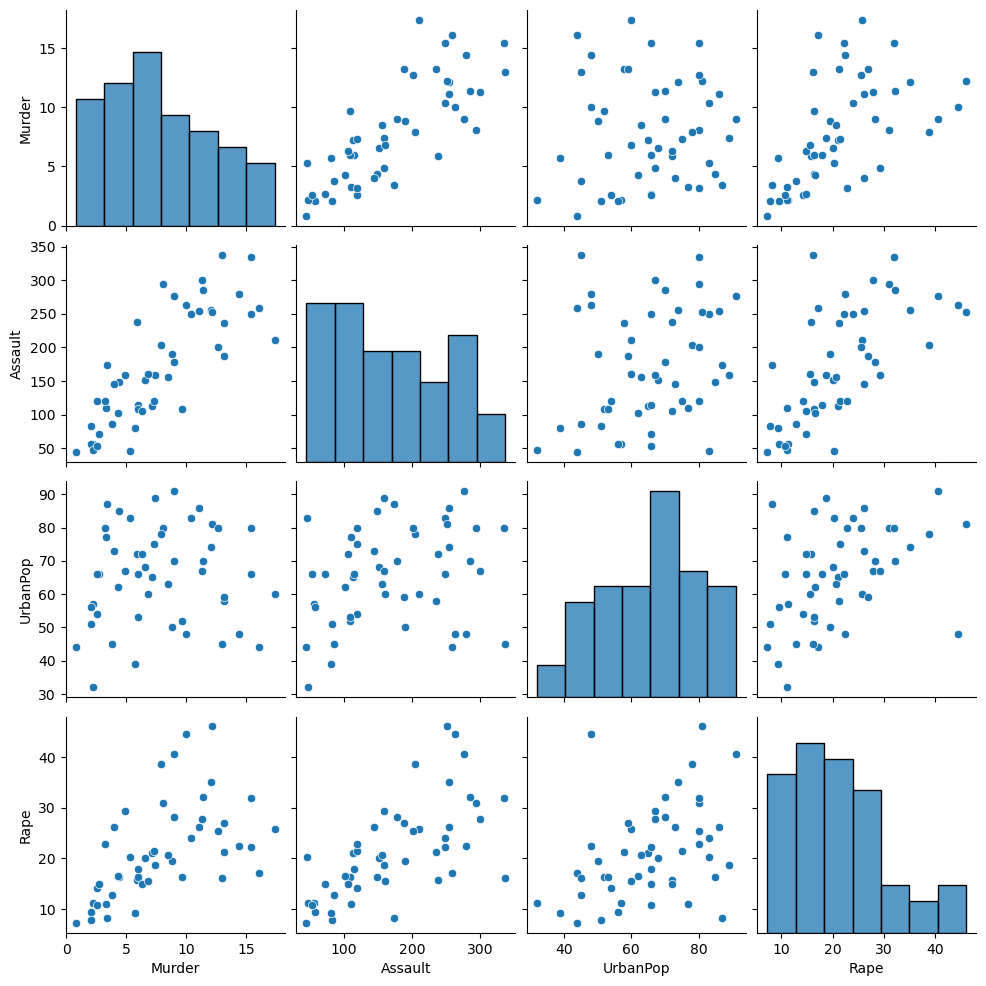

In [196]:
sns.pairplot(crime);

In [197]:
#Correlation Analysis: The scatter plots allow you to observe relationships between pairs of variables. Look for clusters of points, linear or non-linear trends, and variations that could suggest correlations.

#Diagonal Histograms: The histograms along the diagonal provide insights into the distributions of individual variables. You can determine whether variables follow normal distributions, are skewed, or exhibit other distribution shapes.

#Correlation Between Crime Variables: Pay close attention to scatter plots involving different crime-related variables. You might find patterns indicating higher crime rates in states with certain characteristics or demographic factors.

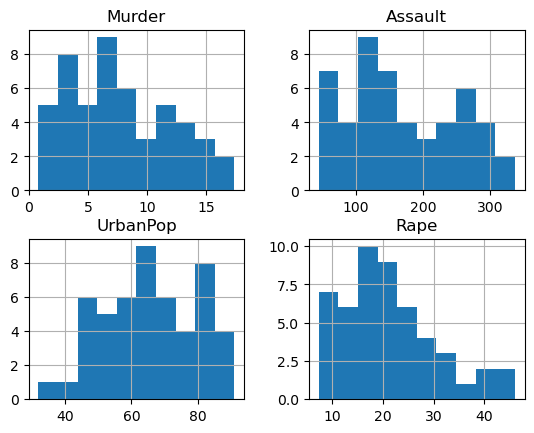

In [198]:
crime.hist();

In [89]:
#Central Tendency: The location of the peak in each histogram gives an idea of the central tendency of the variable. It can be an indicator of the mean or median value.

#Spread and Variability: The width of the histogram provides insights into the spread or variability of the data. A wider histogram suggests higher variability, while a narrower one suggests lower variability.

#Skewness: The direction of skewness can be determined by whether the tail of the distribution extends more to the right (positively skewed) or to the left (negatively skewed).

#Outliers: Outliers can be identified as data points that fall far away from the main cluster of values. These points can affect the mean and other summary statistics.

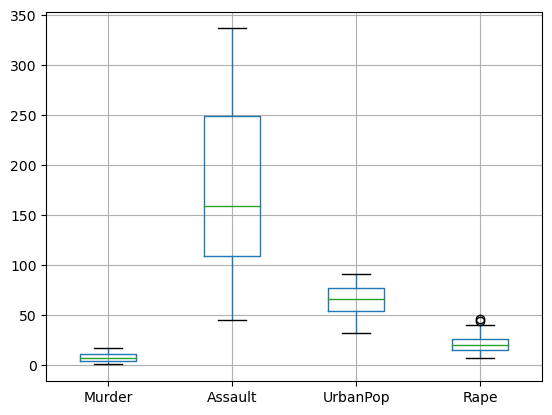

In [90]:
crime.boxplot();

In [91]:
#Central Tendency: The line inside each box represents the median of the data, providing an insight into the central tendency of each variable.

#Variability and Spread: The height of the box indicates the interquartile range (IQR), which represents the spread of the middle 50% of the data. A larger IQR suggests greater variability.

#Skewness: The orientation of the box relative to the median line can indicate the skewness of the distribution. If the box is shifted toward one end of the whisker, it suggests skewness in that direction.

#Outliers: Points beyond the "whiskers" (lines extending from the box) are potential outliers. These are data points that deviate significantly from the rest and may indicate unusual cases or data quality issues.

In [92]:
crime[crime.isnull().any(axis = 1)].shape

(0, 5)

In [93]:
cols = crime.columns
cols

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

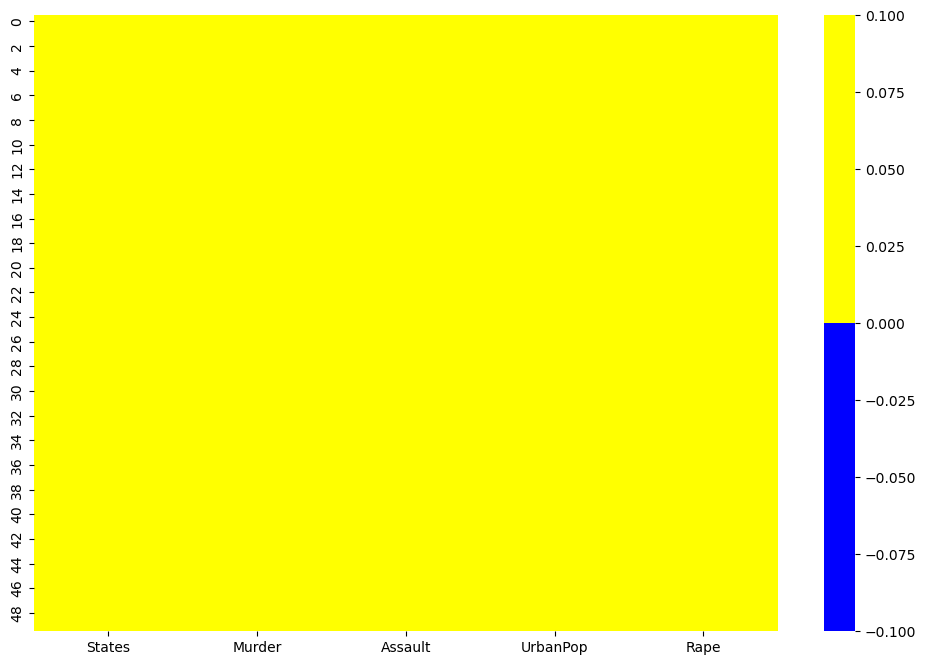

In [94]:
plt.figure(figsize=(12,8))
sns.heatmap(crime[cols].isnull(),cmap= sns.color_palette(['#0000ff','#ffff00']));

In [95]:
#Missing Data Patterns: The heatmap uses colors to represent missing values. Blue indicates missing values (NaN), and yellow indicates non-missing values. You can quickly identify patterns of missingness across different variables.

#Variable Comparison: The heatmap allows you to compare missing data across multiple variables simultaneously. You can identify variables that consistently have missing values or those that share similar patterns of missingness.

#Data Completeness: Dark blue regions suggest areas with many missing values. Lighter regions indicate variables with fewer or no missing values. This helps you assess the overall data completeness.

# Hierarchy Clustering


In [96]:
n = MinMaxScaler()
data= n.fit_transform(crime.iloc[:,1:].to_numpy())
crimes = pd.DataFrame(data, columns = crime.columns[1:])
crimes.head(4)

Murder   Assault  UrbanPop      Rape
0  0.746988  0.654110  0.440678  0.359173
1  0.554217  0.746575  0.271186  0.961240
2  0.439759  0.852740  0.813559  0.612403
3  0.481928  0.496575  0.305085  0.315245

# Clustering

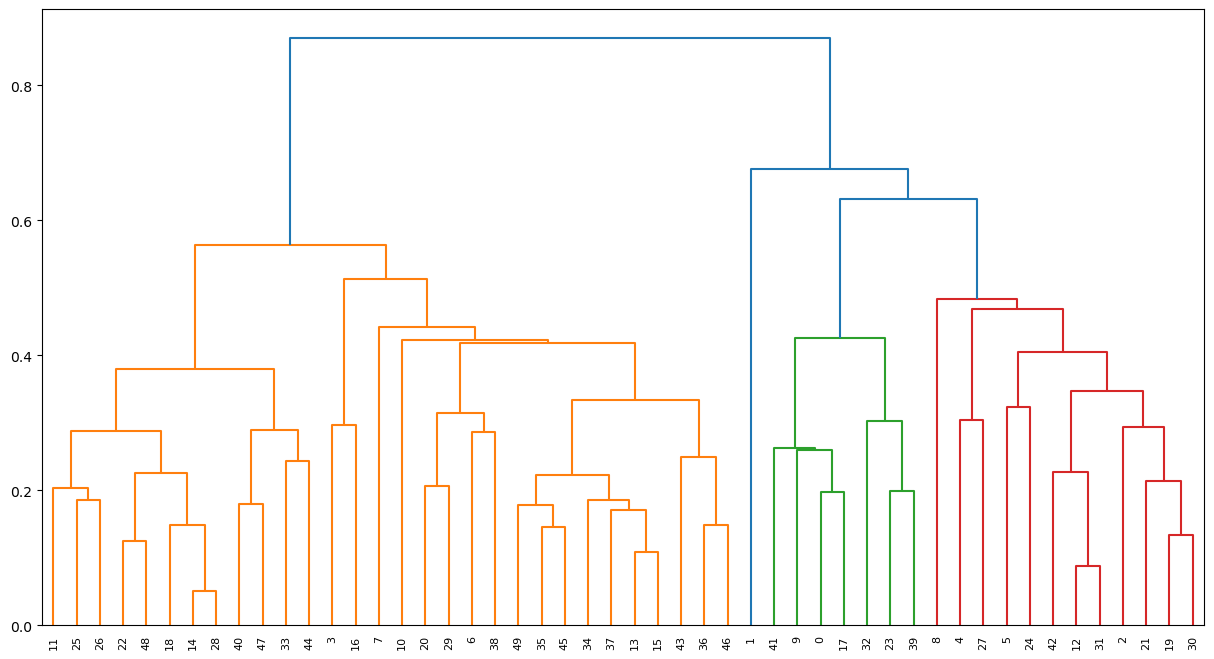

In [97]:
# create dendrogram
fig = plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(crimes, method='average'))

In [98]:
#Cluster Fusion Order: The vertical lines in the dendrogram represent the fusion of clusters. The longer the line, the further apart the clusters were when they merged. Shorter lines indicate recent mergers.

#Cluster Distances: The vertical axis represents the distances between clusters. As you move upward, you're seeing the increase in distances at which clusters were merged.

#Identifying Clusters: Horizontal lines intersecting the vertical lines represent clusters. You can determine the number of clusters by counting the number of intersections at a certain distance level.
    
#Cluster Similarity: Clusters that merge at higher levels of the dendrogram are more similar to each other, and those that merge at lower levels are more distinct.

#Height Interpretation: The height at which a cluster merges gives an idea of the dissimilarity between the merged clusters. Larger heights indicate that the merged clusters were dissimilar.

#Cutting the Dendrogram: To create a specific number of clusters, you can cut the dendrogram horizontally at a certain height. The choice of height determines the number of clusters.    
    

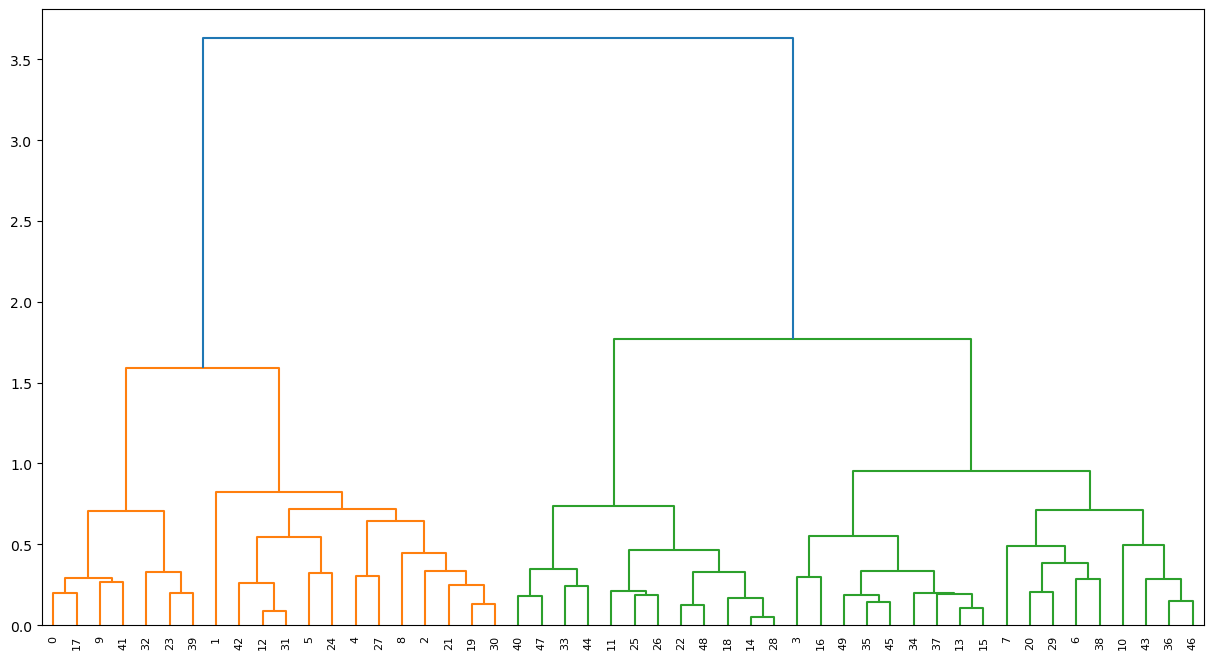

In [99]:
# create dendrogram
fig = plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(crimes, method='ward'))

In [100]:
#Cluster Fusion Order: The vertical lines in the dendrogram indicate the sequence in which clusters are merged. Longer lines suggest clusters that were farther apart when they merged.

#Cluster Distances: The vertical axis represents the distances between clusters. As you move upward, you observe the increase in distances at which clusters were merged.

#Cluster Similarity: Clusters that merge at higher levels of the dendrogram are more similar to each other, while those merging at lower levels are more distinct.

#Height Interpretation: The height at which clusters merge reflects the dissimilarity between the merged clusters. Larger heights indicate greater dissimilarity.

In [101]:
# create clusters
hc1 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [102]:
# save clusters for chart
y2 = hc1.fit_predict(crimes)
cc = pd.DataFrame(y2,columns=['Clusters'])
cc.head(6)

C:\Users\91920\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters
0         3
1         2
2         1
3         0
4         1
5         1

In [103]:
crimes2 = pd.concat([crime,cc],axis=1)
crimes2.head(7)

States  Murder  Assault  UrbanPop  Rape  Clusters
0      Alabama    13.2      236        58  21.2         3
1       Alaska    10.0      263        48  44.5         2
2      Arizona     8.1      294        80  31.0         1
3     Arkansas     8.8      190        50  19.5         0
4   California     9.0      276        91  40.6         1
5     Colorado     7.9      204        78  38.7         1
6  Connecticut     3.3      110        77  11.1         0

In [104]:
crimes2.sort_values("Clusters").reset_index()

index          States  Murder  Assault  UrbanPop  Rape  Clusters
0      49         Wyoming     6.8      161        60  15.6         0
1      28   New Hampshire     2.1       57        56   9.5         0
2      34            Ohio     7.3      120        75  21.4         0
3      26        Nebraska     4.3      102        62  16.5         0
4      25         Montana     6.0      109        53  16.4         0
5      48       Wisconsin     2.6       53        66  10.8         0
6      35        Oklahoma     6.6      151        68  20.0         0
7      22       Minnesota     2.7       72        66  14.9         0
8      36          Oregon     4.9      159        67  29.3         0
9      20   Massachusetts     4.4      149        85  16.3         0
10     37    Pennsylvania     6.3      106        72  14.9         0
11     18           Maine     2.1       83        51   7.8         0
12     38    Rhode Island     3.4      174        87   8.3         0
13     16        Kentucky     9.7      109        52  16.3         0
14     29      New Jersey     7.4      159        89  18.8         0
15     15          Kansas     6.0      115        66  18.0         0
16     13         Indiana     7.2      113        65  21.0         0
17     40    South Dakota     3.8       86        45  12.8         0
18     11           Idaho     2.6      120        54  14.2         0
19     10          Hawaii     5.3       46        83  20.2         0
20     43            Utah     3.2      120        80  22.9         0
21      7        Delaware     5.9      238        72  15.8         0
22      6     Connecticut     3.3      110        77  11.1         0
23     44         Vermont     2.2       48        32  11.2         0
24     45        Virginia     8.5      156        63  20.7         0
25      3        Arkansas     8.8      190        50  19.5         0
26     46      Washington     4.0      145        73  26.2         0
27     47   West Virginia     5.7       81        39   9.3         0
28     14            Iowa     2.2       56        57  11.3         0
29     33    North Dakota     0.8       45        44   7.3         0
30     42           Texas    12.7      201        80  25.5         1
31     24        Missouri     9.0      178        70  28.2         1
32     12        Illinois    10.4      249        83  24.0         1
33     30      New Mexico    11.4      285        70  32.1         1
34     27          Nevada    12.2      252        81  46.0         1
35     21        Michigan    12.1      255        74  35.1         1
36     19        Maryland    11.3      300        67  27.8         1
37      2         Arizona     8.1      294        80  31.0         1
38      4      California     9.0      276        91  40.6         1
39     31        New York    11.1      254        86  26.1         1
40      5        Colorado     7.9      204        78  38.7         1
41      8         Florida    15.4      335        80  31.9         1
42      1          Alaska    10.0      263        48  44.5         2
43     32  North Carolina    13.0      337        45  16.1         3
44     41       Tennessee    13.2      188        59  26.9         3
45     39  South Carolina    14.4      279        48  22.5         3
46     17       Louisiana    15.4      249        66  22.2         3
47     23     Mississippi    16.1      259        44  17.1         3
48      9         Georgia    17.4      211        60  25.8         3
49      0         Alabama    13.2      236        58  21.2         3

In [105]:
crimes2['Clusters'].value_counts()

0    30
1    12
3     7
2     1
Name: Clusters, dtype: int64

# K-Means

In [106]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(crimes)

C:\Users\91920\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91920\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [107]:
kmeans.inertia_

3.683456153585913

In [108]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crimes)
    wcss.append(kmeans.inertia_)

C:\Users\91920\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91920\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91920\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91920\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [109]:
wcss

[13.184122550256445,
 6.596893867946196,
 5.010878493006417,
 3.683456153585913,
 3.1911357068589448,
 2.8460823177953527,
 2.579167434318841]

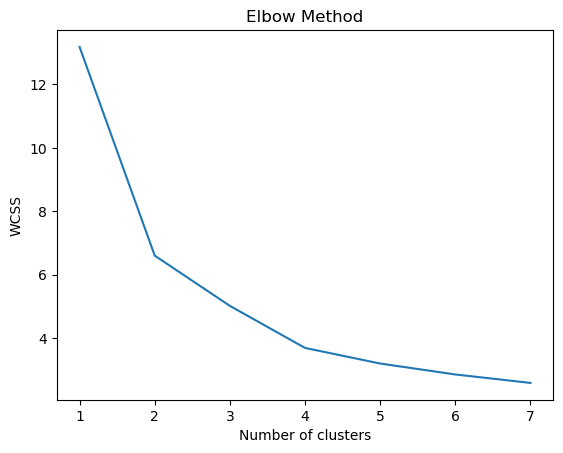

In [110]:
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [111]:
#Optimal Cluster Number: The plot aims to find the "elbow point" where adding more clusters does not lead to a significant reduction in the within-cluster sum of squares (WCSS). The optimal number of clusters is usually chosen at or near this elbow point.

#Trade-off: The plot illustrates the trade-off between the number of clusters and the quality of clustering (lower WCSS). As you increase the number of clusters, the WCSS tends to decrease, but at some point, the rate of decrease slows down, resulting in an "elbow" shape.

#Elbow Identification: Visually inspect the plot to identify the point where the curve starts to level off or form an elbow shape. This is the point where adding more clusters does not provide a substantial improvement in clustering quality.

In [112]:
#Build Cluster algorithm
cc2 = KMeans(4, random_state=8)
cc2.fit(crimes)

C:\Users\91920\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91920\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=8)

In [113]:
cc2.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [114]:
# Converting array to dataframe
df2 = pd.DataFrame(cc2.labels_, columns =['clusters'])

In [115]:
crimes3 = pd.concat([crime,df2], axis=1)
crimes3.head(4)

States  Murder  Assault  UrbanPop  Rape  clusters
0   Alabama    13.2      236        58  21.2         1
1    Alaska    10.0      263        48  44.5         3
2   Arizona     8.1      294        80  31.0         3
3  Arkansas     8.8      190        50  19.5         1

In [116]:
crimes3['clusters'].value_counts()


0    17
2    13
3    12
1     8
Name: clusters, dtype: int64

In [120]:
crimes3.groupby('clusters').agg(['mean'])


C:\Users\91920\AppData\Local\Temp\ipykernel_11836\2624870676.py:1: FutureWarning: ['States'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crimes3.groupby('clusters').agg(['mean'])


Murder     Assault   UrbanPop       Rape
               mean        mean       mean       mean
clusters                                             
0          5.852941  141.176471  73.647059  19.335294
1         13.937500  243.625000  53.750000  21.412500
2          3.600000   78.538462  52.076923  12.176923
3         10.966667  264.000000  76.500000  33.608333

# DBSCAN

In [121]:
array = crimes.values
#array

In [122]:
stscaler = StandardScaler().fit(array)

In [123]:
X2 = stscaler.transform(array)

In [124]:
X2

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [125]:
dbscan2 = DBSCAN(eps=0.98, min_samples=3)
dbscan2.fit(X2)

DBSCAN(eps=0.98, min_samples=3)

In [126]:
#Noisy samples are given the label -1.
dbscan2.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0, -1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1, -1,  1,  1,  1,  1,  1],
      dtype=int64)

In [129]:
c2 = pd.DataFrame(dbscan2.labels_,columns=['Cluster ID'])
c2.value_counts()

Cluster ID
 1            26
-1            12
 0             6
 2             3
 3             3
dtype: int64

In [130]:
crimes4 = pd.concat([crime,c2],axis=1)
crimes4


States  Murder  Assault  UrbanPop  Rape  Cluster ID
0          Alabama    13.2      236        58  21.2           0
1           Alaska    10.0      263        48  44.5          -1
2          Arizona     8.1      294        80  31.0          -1
3         Arkansas     8.8      190        50  19.5          -1
4       California     9.0      276        91  40.6          -1
5         Colorado     7.9      204        78  38.7          -1
6      Connecticut     3.3      110        77  11.1           1
7         Delaware     5.9      238        72  15.8          -1
8          Florida    15.4      335        80  31.9          -1
9          Georgia    17.4      211        60  25.8           0
10          Hawaii     5.3       46        83  20.2          -1
11           Idaho     2.6      120        54  14.2           1
12        Illinois    10.4      249        83  24.0           2
13         Indiana     7.2      113        65  21.0           1
14            Iowa     2.2       56        57  11.3           1
15          Kansas     6.0      115        66  18.0           1
16        Kentucky     9.7      109        52  16.3           1
17       Louisiana    15.4      249        66  22.2           0
18           Maine     2.1       83        51   7.8           1
19        Maryland    11.3      300        67  27.8           3
20   Massachusetts     4.4      149        85  16.3           1
21        Michigan    12.1      255        74  35.1           3
22       Minnesota     2.7       72        66  14.9           1
23     Mississippi    16.1      259        44  17.1           0
24        Missouri     9.0      178        70  28.2          -1
25         Montana     6.0      109        53  16.4           1
26        Nebraska     4.3      102        62  16.5           1
27          Nevada    12.2      252        81  46.0          -1
28   New Hampshire     2.1       57        56   9.5           1
29      New Jersey     7.4      159        89  18.8           1
30      New Mexico    11.4      285        70  32.1           3
31        New York    11.1      254        86  26.1           2
32  North Carolina    13.0      337        45  16.1          -1
33    North Dakota     0.8       45        44   7.3           1
34            Ohio     7.3      120        75  21.4           1
35        Oklahoma     6.6      151        68  20.0           1
36          Oregon     4.9      159        67  29.3           1
37    Pennsylvania     6.3      106        72  14.9           1
38    Rhode Island     3.4      174        87   8.3           1
39  South Carolina    14.4      279        48  22.5           0
40    South Dakota     3.8       86        45  12.8           1
41       Tennessee    13.2      188        59  26.9           0
42           Texas    12.7      201        80  25.5           2
43            Utah     3.2      120        80  22.9           1
44         Vermont     2.2       48        32  11.2          -1
45        Virginia     8.5      156        63  20.7           1
46      Washington     4.0      145        73  26.2           1
47   West Virginia     5.7       81        39   9.3           1
48       Wisconsin     2.6       53        66  10.8           1
49         Wyoming     6.8      161        60  15.6           1

In [139]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Load the dataset
crime = pd.read_csv("C:\\Users\\91920\\Downloads\\crime_data.csv")

# Drop columns other than 'Murder' and 'Assault'
crime_numeric = crime[['Murder', 'Assault']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(crime_numeric)

# Perform DBSCAN clustering
eps = 0.98  # Specify the epsilon parameter
min_samples = 3  # Specify the min_samples parameter
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Create a DataFrame with the DBSCAN cluster labels
df2 = pd.DataFrame(dbscan_labels, columns=['clusters'])

# Concatenate cluster labels with the original DataFrame
crimes3 = pd.concat([crime, df2], axis=1)

# Display the value counts of clusters
print(crimes3['clusters'].value_counts())

# Group by clusters and calculate mean values
cluster_means = crimes3.groupby('clusters').mean()

# Perform PCA on standardized data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Add PCA results to the DataFrame
crimes4 = pd.concat([crime, df2, pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])], axis=1)

# Display the updated DataFrame
print(crimes4.head())


0    50
Name: clusters, dtype: int64
   Unnamed: 0  Murder  Assault  UrbanPop  Rape  clusters      PCA1      PCA2
0     Alabama    13.2      236        58  21.2         0  1.446717  0.328375
1      Alaska    10.0      263        48  44.5         0  1.153346 -0.427829
2     Arizona     8.1      294        80  31.0         0  1.107455 -1.005121
3    Arkansas     8.8      190        50  19.5         0  0.330870  0.001058
4  California     9.0      276        91  40.6         0  1.100773 -0.703247


C:\Users\91920\AppData\Local\Temp\ipykernel_11836\1973802186.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = crimes3.groupby('clusters').mean()


In [140]:
#Cluster Characteristics:
#Explore the characteristics of each cluster to understand the crime rate patterns associated with each cluster.
#Different clusters may correspond to areas with high or low crime rates.

#PCA Visualization:
#PCA reduced the two-dimensional feature space ("Murder" and "Assault") into two dimensions, which can be visually analyzed.
#PCA visualization helps to understand the separation or overlap of clusters in the reduced space.

# Plotly 

In [231]:
import pandas as pd
import plotly.express as px

# Load the crime_data dataset
crime = pd.read_csv("C:\\Users\\91920\\Downloads\\crime_data.csv")

# Assuming you want to visualize columns like 'Murder' and 'Assault'
x_column = 'Murder'
y_column = 'Assault'

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(crime, x=x_column, y=y_column,
                 title='Interactive Scatter Plot with Plotly Express')
fig.show()


In [233]:
#Correlation: Observe the relationship between "Murder" and "Assault" in the scatter plot. Do states with higher murder rates tend to have higher assault rates, or is there little correlation between the two?

#Clusters or Patterns: Look for any clustering or patterns in the data points. Do states naturally form distinct groups based on their crime rates, or are the points scattered without clear groupings?

#Outliers: Identify any outliers that deviate significantly from the general trend. These could represent states with unique characteristics that contribute to higher or lower crime rates.

# Bohek

In [232]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource

# Load the crime_data dataset
crime = pd.read_csv("C:\\Users\\91920\\Downloads\\crime_data.csv")

# Assuming you want to visualize columns like 'Murder' and 'Assault'
x_column = 'Murder'
y_column = 'Assault'

# Create a Bokeh figure
source = ColumnDataSource(data=crime)
p = figure(width=800, height=600, title='Interactive Scatter Plot with Bokeh')

# Add scatter plot
p.circle(x_column, y_column, source=source, size=10)

# Show the plot
output_notebook()
show(p)


Loading BokehJS ...

In [234]:
#Density and Clusters: Observe the density of data points in different areas of the scatter plot. Are there densely populated areas that correspond to specific crime rate ranges?

#Interactive Exploration: Utilize Bokeh's interactive tools to pan, zoom, and inspect specific data points. Hover over points to see additional information.

#Trends and Relationships: Analyze the overall trend and relationship between "Murder" and "Assault." Does the plot suggest a positive correlation, a negative correlation, or no significant correlation?

#Outliers and Extreme Values: Identify states that stand out as outliers in terms of crime rates. These states could be interesting for further investigation to understand why they deviate from the norm.